In [143]:
##Importing necessary libraries using alias =(Alias ko prayog gari awashyak libraries import gardai )
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
#Importing the Diabetes Prediction dataset from google drive =(Google Drive bata diabetes prediction dataset import gardai )
df = pd.read_csv(r"D:\AI\ai_and_its_applications\Project\project_three\diabetes_old\diabetes\diabetes.csv")

In [145]:
#Creating a copy of the data (Data ko ek copy banaidai)
df_copy = df.copy()

In [146]:
#Column name display gareko
df_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [147]:
#Data Profiling
print("Basic information of the Diabetes Prediction daata(columns, datatype , non-nullcounts)")
print(df_copy.info())

Basic information of the Diabetes Prediction daata(columns, datatype , non-nullcounts)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [148]:
print("Basic statistics of the Diabetes Prediction data (numerical columns):")
(df_copy.describe())

Basic statistics of the Diabetes Prediction data (numerical columns):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [149]:
print("Shape of the Diabetes Prediction data (rows and columns):")
print(df_copy.shape)

Shape of the Diabetes Prediction data (rows and columns):
(768, 9)


In [150]:
print("First five rows of the Diabetes Prediction Data:")
df_copy.head()

First five rows of the Diabetes Prediction Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [151]:
print("Last five rows of the Diabetes Prediction data:")
df_copy.tail()

Last five rows of the Diabetes Prediction data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [152]:
#getting the value counts for each categorical feature = (Only Outcome in this case)
df_copy['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [153]:
##Checking for any null values
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

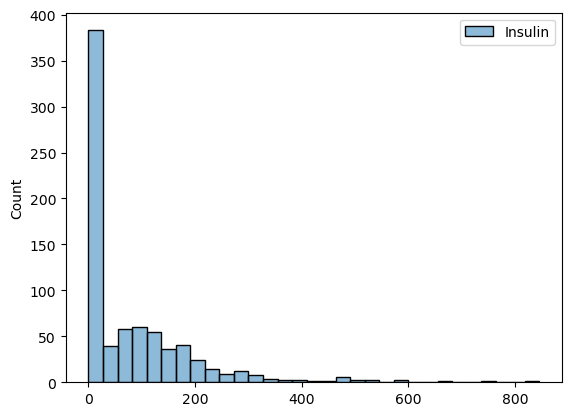

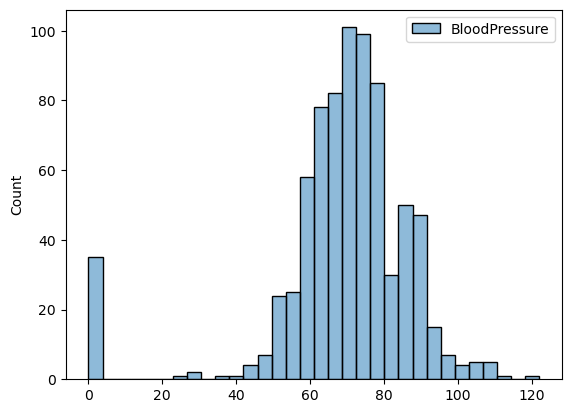

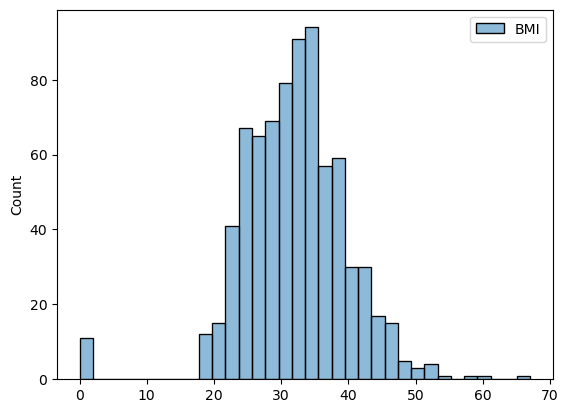

In [154]:
##In case of Insulin, BloodPressure, BMI we have zero values --- we replace them by np.nan and then impute them using median mean values because they are all skewed

sns.histplot(df_copy[['Insulin']])
plt.show()
sns.histplot(df_copy[['BloodPressure']])
plt.show()
sns.histplot(df_copy[['BMI']])
plt.show()

In [157]:
for col in ['Insulin',"BloodPressure", 'BMI']:
    df_copy[col] = df_copy[col].replace(0, np.nan)

In [158]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [159]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [160]:
##Using knn imputation for filling in insulin values
from sklearn.impute import KNNImputer
cols_for_impute = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

impute_df = df_copy[cols_for_impute]
imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(impute_df)

df_copy.loc[:, cols_for_impute] = imputed_array


#Mean for BMI and Bloodpressure since they have near normal distribution
for col in ["BloodPressure", 'BMI']:
    df_copy[col].fillna(df_copy[col].mean(), inplace=True)

C:\Users\Rashmi\AppData\Local\Temp\ipykernel_25016\1856997622.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col].fillna(df_copy[col].mean(), inplace=True)


In [161]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [181]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [162]:
##Checking for duplicate values (based on all columns besides ID)
duplicate_count = df_copy.duplicated(subset=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']).sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


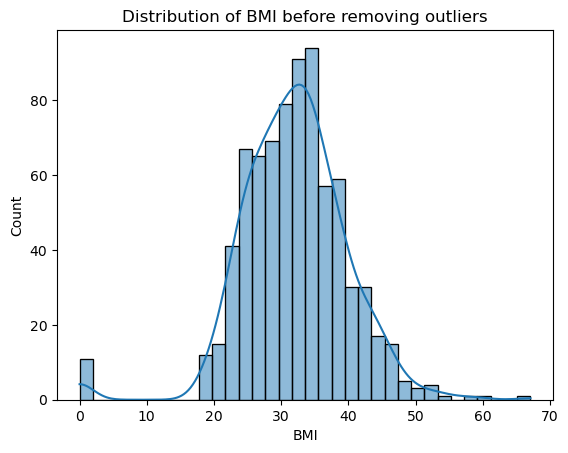

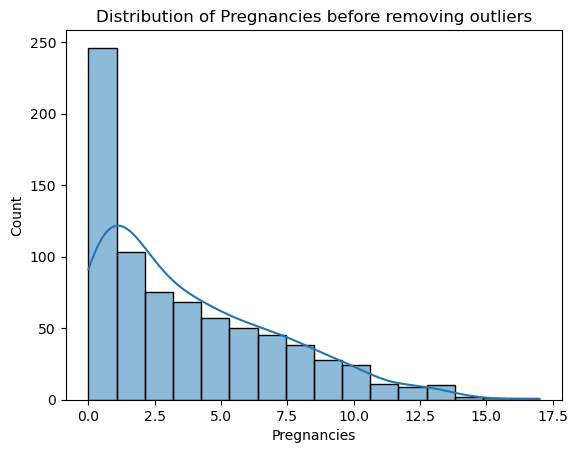

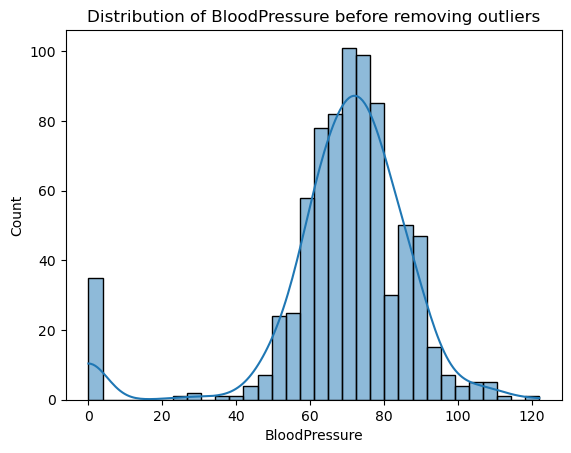

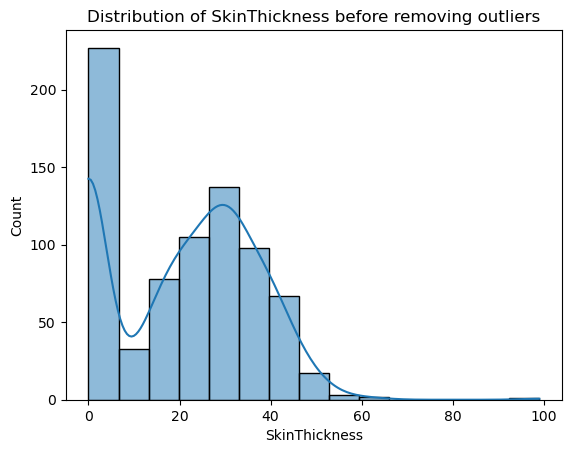

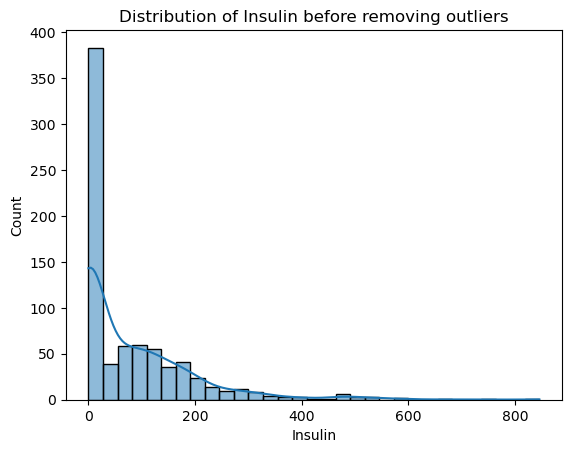

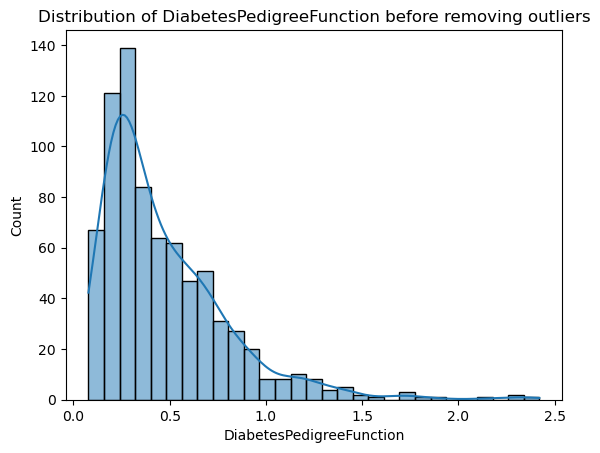

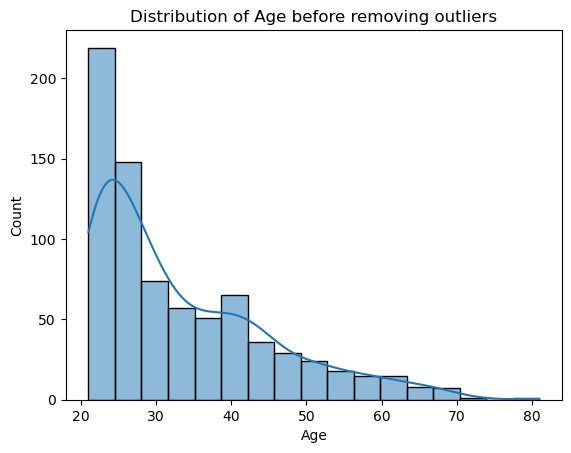

In [163]:
#Univariate Analysis
#Create a histrogram with a KDE overlay to show the distribution of different variables

sns.histplot(df["BMI"], kde = True)
plt.title('Distribution of BMI before removing outliers')
plt.show()

sns.histplot(df["Pregnancies"], kde = True)
plt.title('Distribution of Pregnancies before removing outliers')
plt.show()

sns.histplot(df["BloodPressure"], kde = True)
plt.title('Distribution of BloodPressure before removing outliers')
plt.show()

sns.histplot(df["SkinThickness"], kde = True)
plt.title('Distribution of SkinThickness before removing outliers')
plt.show()

sns.histplot(df["Insulin"], kde = True)
plt.title('Distribution of Insulin before removing outliers')
plt.show()

sns.histplot(df["DiabetesPedigreeFunction"], kde = True)
plt.title('Distribution of DiabetesPedigreeFunction before removing outliers')
plt.show()

sns.histplot(df["Age"], kde = True)
plt.title('Distribution of Age before removing outliers')
plt.show()

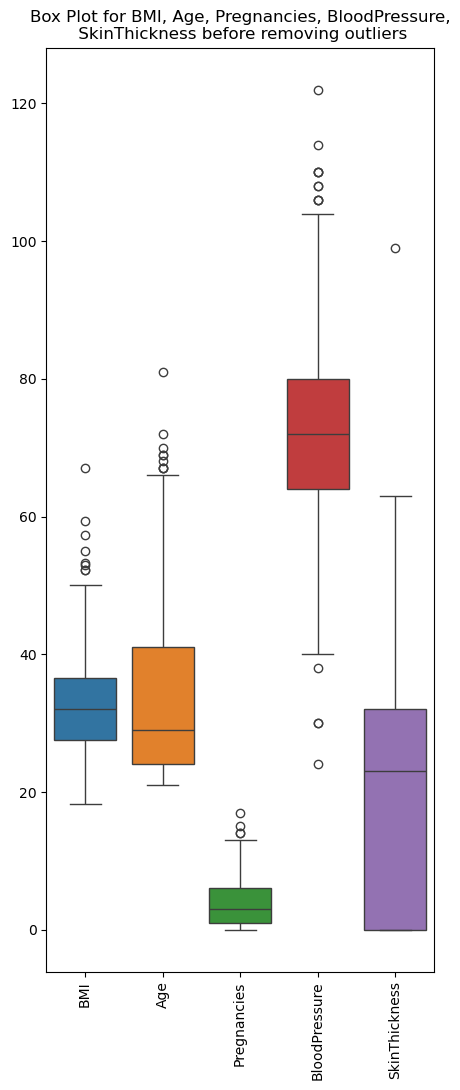

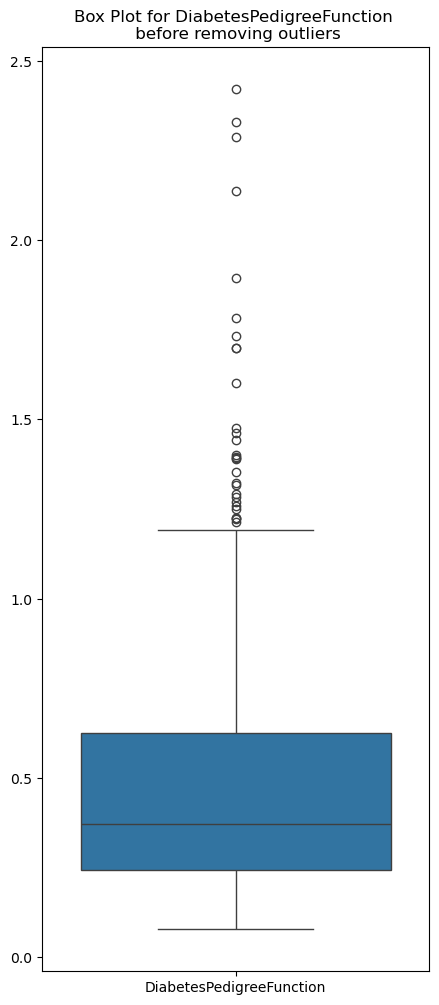

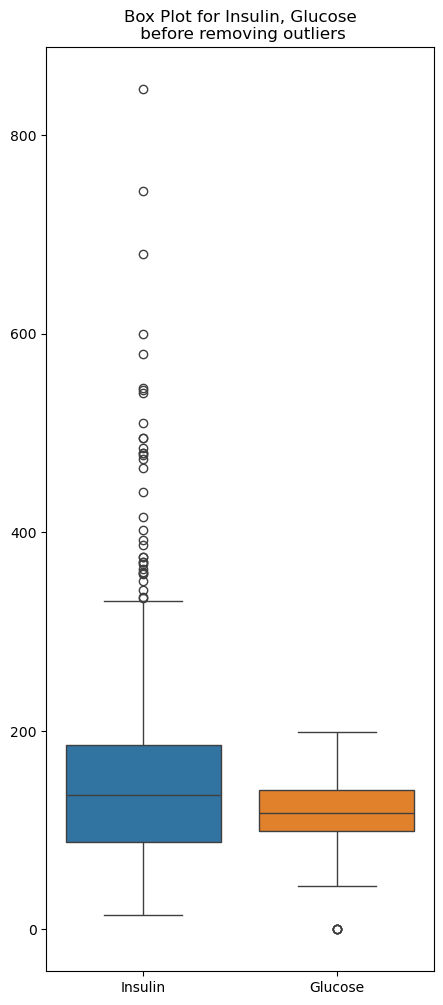

In [164]:

# Boxplot before removing outliers
plt.figure(figsize=(5, 12))
sns.boxplot(df_copy[["BMI", 'Age',"Pregnancies", 'BloodPressure', 'SkinThickness']])
plt.title("Box Plot for BMI, Age, Pregnancies, BloodPressure,\n SkinThickness before removing outliers")
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(5, 12))
sns.boxplot(df_copy[['DiabetesPedigreeFunction']])
plt.title("Box Plot for DiabetesPedigreeFunction \n before removing outliers")
plt.show()

# Boxplot before removing outliers
plt.figure(figsize=(5, 12))
sns.boxplot(df_copy[["Insulin", 'Glucose']])
plt.title("Box Plot for Insulin, Glucose\n before removing outliers")
plt.show()

In [165]:
#Creating a fucntion to remove outliers using IQR
def iqr_outlier(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        iqr = Q3 - Q1

        upper_limit = Q3 + 1.5 * iqr
        lower_limit = Q1 - 1.5 * iqr

        df_no_outliers = df[(df[col] < upper_limit) & (df[col] > lower_limit)]

    return df_no_outliers

In [166]:
outlier_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

df_no_outliers = iqr_outlier(df_copy, outlier_cols)
#Number of ourliers removed
print("Number of outliers removed",df.shape[0] - df_no_outliers.shape[0])
print("Percent of outliers removed",((df.shape[0] - df_no_outliers.shape[0])/df.shape[0]) * 100, '%')

Number of outliers removed 9
Percent of outliers removed 1.171875 %


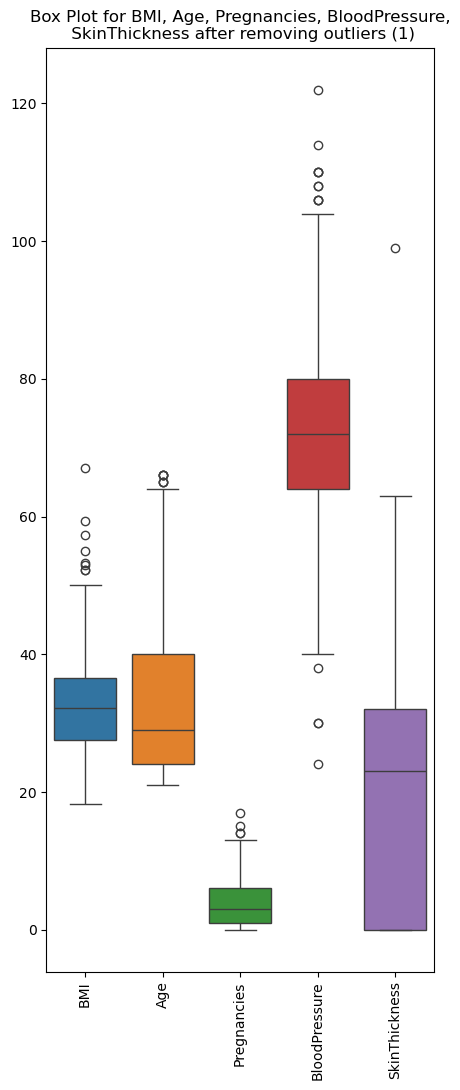

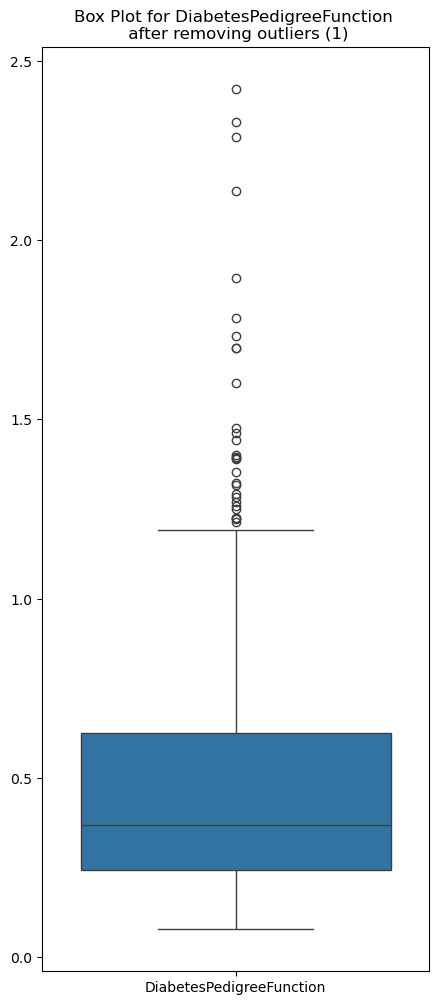

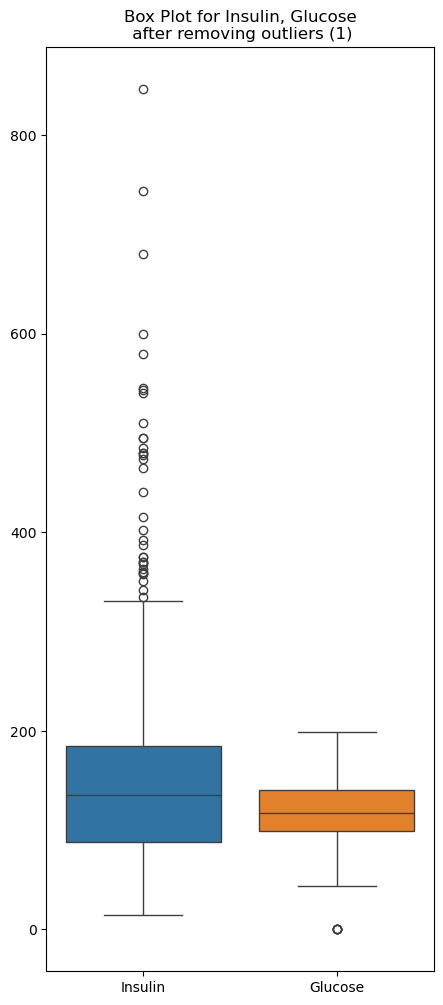

In [167]:

# Boxplot after removing outliers once 
plt.figure(figsize=(5, 12))
sns.boxplot(df_no_outliers[["BMI", 'Age',"Pregnancies", 'BloodPressure', 'SkinThickness']])
plt.title("Box Plot for BMI, Age, Pregnancies, BloodPressure,\n SkinThickness after removing outliers (1)")
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(5, 12))
sns.boxplot(df_no_outliers[['DiabetesPedigreeFunction']])
plt.title("Box Plot for DiabetesPedigreeFunction \n after removing outliers (1)")
plt.show()


# Boxplot after removing outliers (1)
plt.figure(figsize=(5, 12))
sns.boxplot(df_no_outliers[["Insulin", 'Glucose']])
plt.title("Box Plot for Insulin, Glucose\n after removing outliers (1)")
plt.show()

In [168]:
#Since there are still some outliers, we remove outliers again using the IQR method
df_no_outliers2 = iqr_outlier(df_no_outliers, outlier_cols)
#Number of ourliers removed
print("Number of outliers removed",df.shape[0] - df_no_outliers2.shape[0])
print("Percent of outliers removed",((df.shape[0] - df_no_outliers2.shape[0])/df.shape[0]) * 100, '%')

Number of outliers removed 17
Percent of outliers removed 2.213541666666667 %


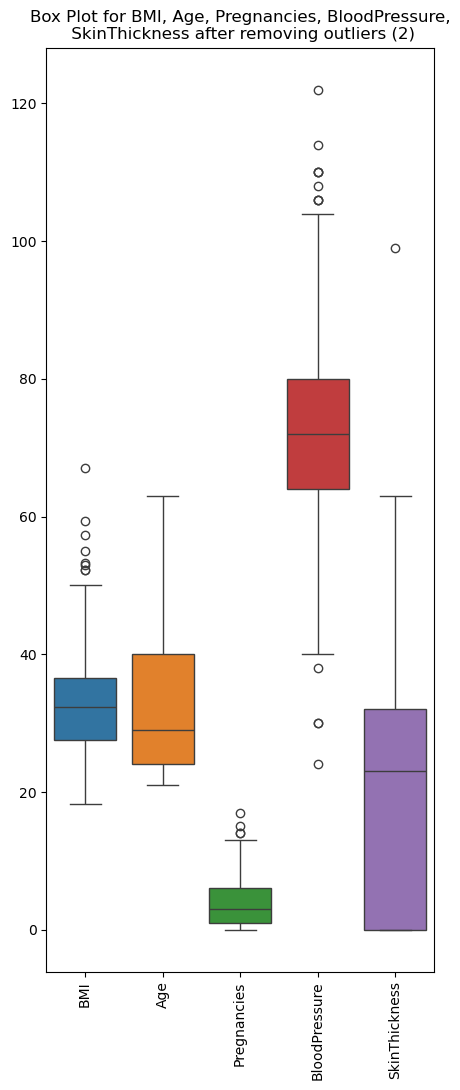

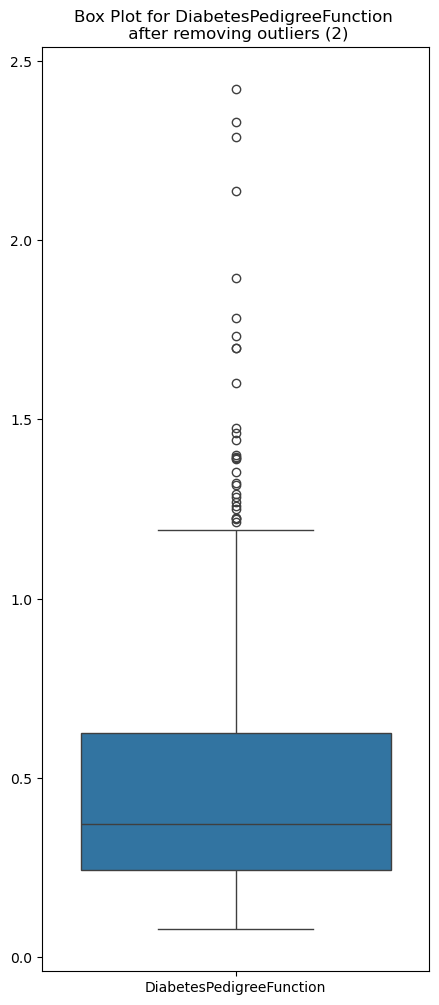

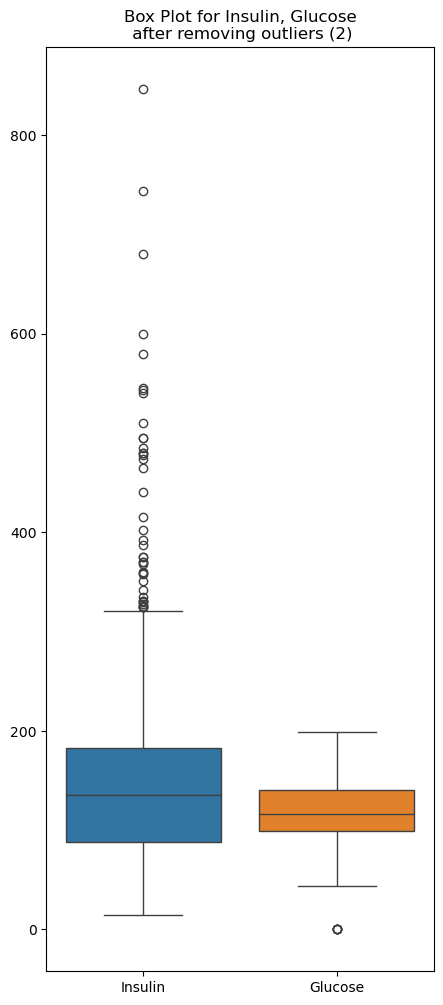

In [170]:
# Boxplot after removing outliers (2)
plt.figure(figsize=(5, 12))
sns.boxplot(df_no_outliers2[["BMI", 'Age',"Pregnancies", 'BloodPressure', 'SkinThickness']])
plt.title("Box Plot for BMI, Age, Pregnancies, BloodPressure,\n SkinThickness after removing outliers (2)")
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(5, 12))
sns.boxplot(df_no_outliers2[['DiabetesPedigreeFunction']])
plt.title("Box Plot for DiabetesPedigreeFunction \n after removing outliers (2)")
plt.show()

# Boxplot after removing outliers (2)
plt.figure(figsize=(5, 12))
sns.boxplot(df_no_outliers2[["Insulin", 'Glucose']])
plt.title("Box Plot for Insulin, Glucose\n after removing outliers (2)")
plt.show()

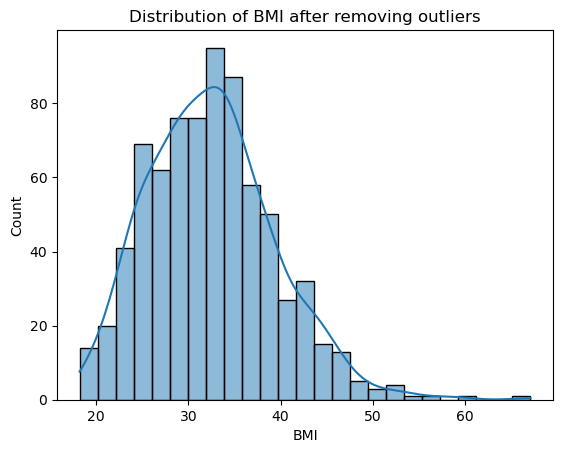

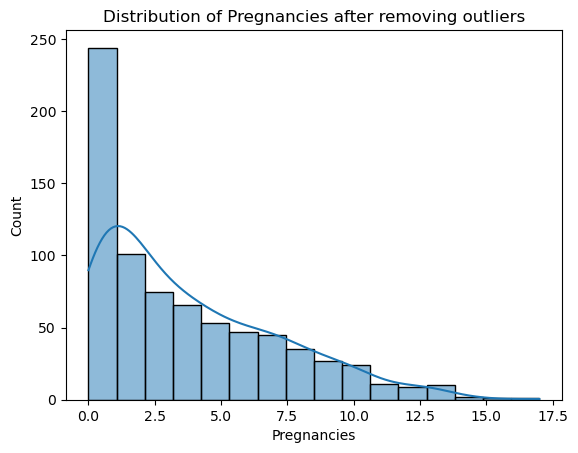

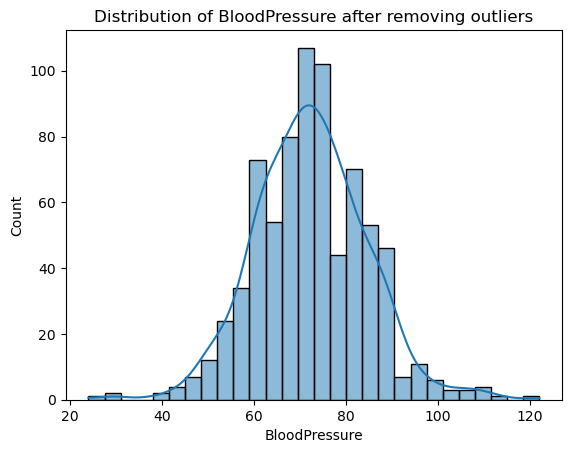

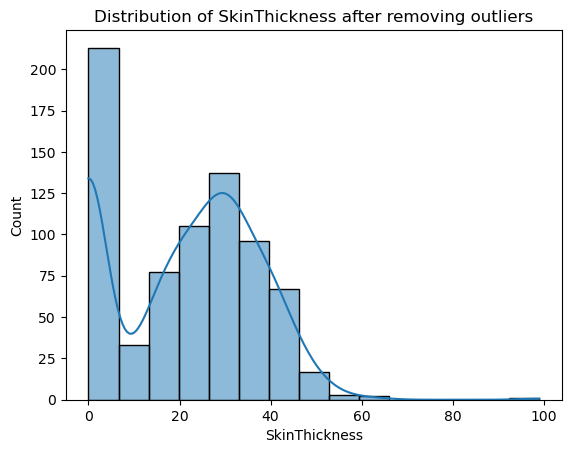

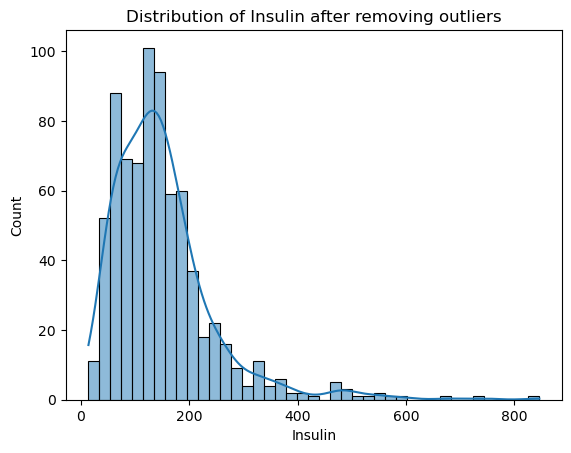

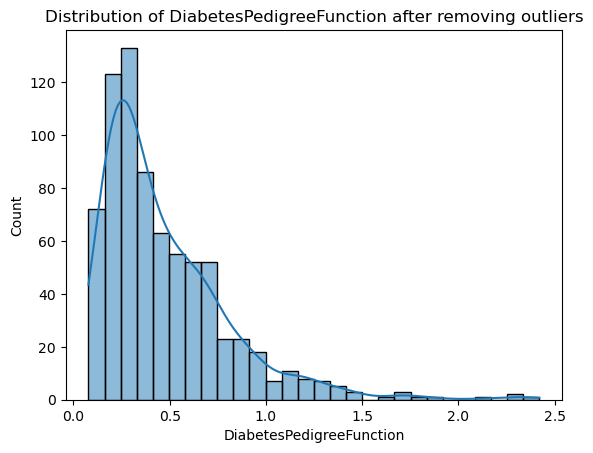

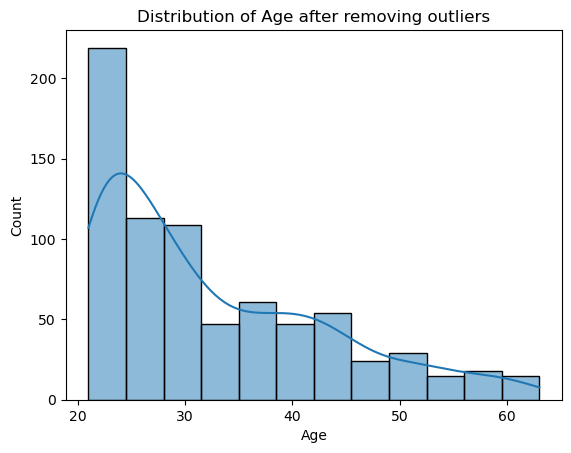

In [171]:
#Univariate Analysis
#Create a histrogram with a KDE overlay to show the distribution of different variables

sns.histplot(df_no_outliers2["BMI"], kde = True)
plt.title('Distribution of BMI after removing outliers')
plt.show()

sns.histplot(df_no_outliers2["Pregnancies"], kde = True)
plt.title('Distribution of Pregnancies after removing outliers')
plt.show()

sns.histplot(df_no_outliers2["BloodPressure"], kde = True)
plt.title('Distribution of BloodPressure after removing outliers')
plt.show()

sns.histplot(df_no_outliers2["SkinThickness"], kde = True)
plt.title('Distribution of SkinThickness after removing outliers')
plt.show()

sns.histplot(df_no_outliers2["Insulin"], kde = True)
plt.title('Distribution of Insulin after removing outliers')
plt.show()

sns.histplot(df_no_outliers2["DiabetesPedigreeFunction"], kde = True)
plt.title('Distribution of DiabetesPedigreeFunction after removing outliers')
plt.show()

sns.histplot(df_no_outliers2["Age"], kde = True)
plt.title('Distribution of Age after removing outliers')
plt.show()

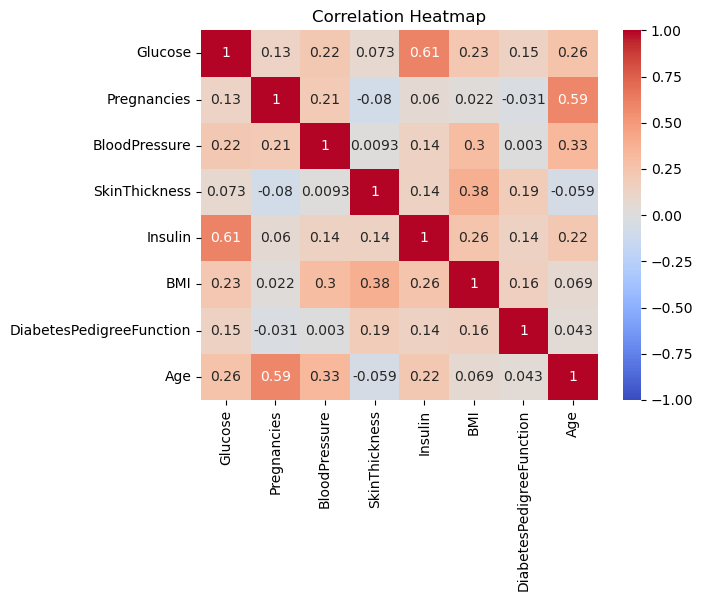

In [172]:
# Getting correlation matrix using numeric data only (not outcome)
correl = df_no_outliers2[['Glucose','Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].corr()
sns.heatmap(correl, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [30]:
# ##Getting the pairplot for numeric columns
# sns.pairplot(df_no_outliers2, hue = 'Outcome')

In [ ]:
# #Creating kde plots for our 'Outcome' column

# sns.kdeplot(df_copy["Outcome"])
# plt.title("KDE plot for Outcome before removing outliers")
# plt.show()


In [ ]:
# # Convert BMI and Glucose to float if still string
# df_no_outliers['BMI'] = df_no_outliers['BMI'].astype(float)
# df_no_outliers['Glucose'] = df_no_outliers['Glucose'].astype(float)

# # 1. Count of each Outcome (0 = No Diabetes, 1 = Diabetes)
# sns.countplot(x='Outcome', data=df_no_outliers, color='red')
# plt.title("Number of People by Outcome")
# plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
# plt.ylabel("Count")
# plt.show()

# # 2. Total Glucose per Outcome group
# total_glucose = df_no_outliers.groupby('Outcome')[['Glucose']].sum().reset_index()
# sns.barplot(x='Outcome', y='Glucose', data=total_glucose, color='blue')
# plt.title("Total Glucose by Outcome")
# plt.xlabel("Outcome")
# plt.ylabel("Total Glucose")
# plt.show()

# # 3. Average BMI per Outcome group
# avg_bmi = df_no_outliers.groupby('Outcome')[['BMI']].mean().reset_index()
# sns.barplot(x='Outcome', y='BMI', data=avg_bmi, color='green')
# plt.title("Average BMI by Outcome")
# plt.xlabel("Outcome")
# plt.ylabel("Average BMI")
# plt.show()

In [ ]:
# # Create a column to represent patient ID (e.g., index)
# df_no_outliers2['Patient ID'] = df_no_outliers2.index

# # Top 10 patients by Glucose level
# top10_glucose = df_no_outliers2.sort_values(by='Glucose', ascending=False).head(10)

# # print(top10_glucose)
# # Barplot for top 10 patients with highest glucose levels
# sns.barplot(x='Patient ID', y='Glucose', data=top10_glucose, color='purple')
# plt.title("Top 10 Patients by Glucose Level")
# plt.xlabel("Glucose Level")
# plt.ylabel("Patient ID")
# plt.show()


In [173]:
#Feature Engineering

# BMI category
df_no_outliers2['BMI_Category'] = pd.cut(df_no_outliers2['BMI'],
                                bins=[0, 18.5, 24.9, 29.9, 100],
                                labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Age groups
df_no_outliers2['Age_Group'] = pd.cut(df_no_outliers2['Age'],
                             bins=[0, 12, 20, 40, 60, 100],
                             labels=['Child', 'Teenager','Young Adult', 'Middle Aged Adult', 'Senior'])

df_no_outliers2.head()


C:\Users\Rashmi\AppData\Local\Temp\ipykernel_25016\3978632219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers2['BMI_Category'] = pd.cut(df_no_outliers2['BMI'],
C:\Users\Rashmi\AppData\Local\Temp\ipykernel_25016\3978632219.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers2['Age_Group'] = pd.cut(df_no_outliers2['Age'],


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Age_Group
0,6,148,72.0,35,169.0,33.6,0.627,50,1,Obese,Middle Aged Adult
1,1,85,66.0,29,58.6,26.6,0.351,31,0,Overweight,Young Adult
2,8,183,64.0,0,188.4,23.3,0.672,32,1,Normal,Young Adult
3,1,89,66.0,23,94.0,28.1,0.167,21,0,Overweight,Young Adult
4,0,137,40.0,35,168.0,43.1,2.288,33,1,Obese,Young Adult


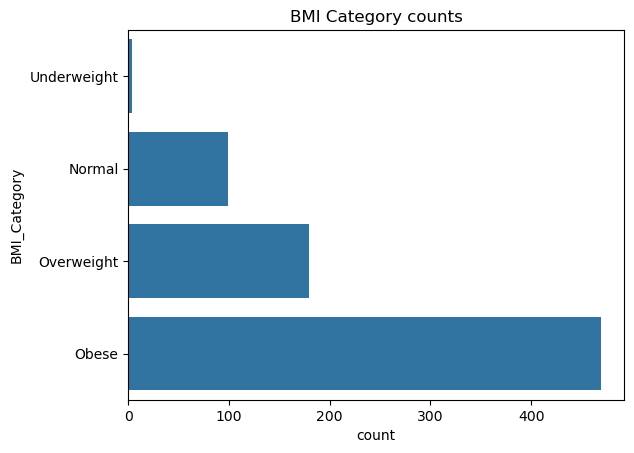

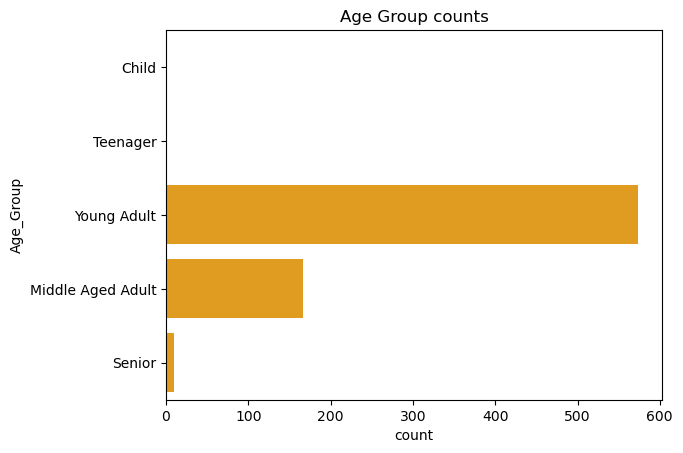

In [189]:
sns.countplot(df_no_outliers2['BMI_Category'])
plt.title("BMI Category counts")
plt.show()

sns.countplot(df_no_outliers2['Age_Group'], color = 'orange')
plt.title("Age Group counts")
plt.show()



## **Regression to predict glucose levels**

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
###Since there are no features that depend on another features, we include them all in the model (X)
#Not skinthickness
# Getting the features (X) and target (y)
X = df_no_outliers2[['Pregnancies','BloodPressure','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values      
y = df_no_outliers2[['Glucose']].values          

#Splitting into train and test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# Initialize the scaler to scale the values 
scaler = StandardScaler()
# Scaling x values
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)

#Generating the Linear Regression model and fitting our train data
model_1 = LinearRegression()
model_1.fit(x_train_scaled, y_train)

##Evaluating model performance using MSE, MAE, and R2 after predicting values for train and test
y_train_pred = model_1.predict(x_train_scaled)
y_test_pred = model_1.predict(x_test_scaled)

#MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

#MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

#R squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

Training MSE: 599.7565990381454
Testing MSE: 615.2679470442696
Training MAE: 18.065248104900874
Testing MAE: 17.692772664399005
Training R-squared: 0.411594373136716
Testing R-squared: 0.3784001915677885


In [190]:
###Since there are no features that depend on another features, we include them all in the model (X)

##Decision tree

#Not skinthickness

# Getting the features (X) and target (y)
X = df_no_outliers2[['Pregnancies','BloodPressure','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values  
y = df_no_outliers2[['Glucose']].values          

#Splitting into train and test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# Initialize the scaler to scale the values 
base_scaler = StandardScaler()
# Scaling x values
x_train_scaled = base_scaler.fit_transform(X_train)
x_test_scaled = base_scaler.fit_transform(X_test)

#Generating the Linear Regression model and fitting our train data
base_rf_model = RandomForestRegressor()
base_rf_model.fit(x_train_scaled, y_train)

##Evaluating model performance using MSE, MAE, and R2 after predicting values for train and test
y_train_pred = base_rf_model.predict(x_train_scaled)
y_test_pred = base_rf_model.predict(x_test_scaled)

#MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

#MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

#R squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

c:\Users\Rashmi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training MSE: 79.4328895
Testing MSE: 556.174213245033
Training MAE: 6.712016666666667
Testing MAE: 18.061986754966885
Training R-squared: 0.9220704545564544
Testing R-squared: 0.43810207232658993


In [177]:
#Parameters to be used in ridge
params = {'alpha':[0.1, 1.0, 10.0, 100.0]}

grid = GridSearchCV(Ridge(), param_grid = params, cv = 5, scoring = 'neg_mean_squared_error')
grid.fit(x_train_scaled, y_train)

print("Best Hyperparameters:", grid.best_params_)
##ridge - gives weight to important features 

best_alpha = grid.best_params_['alpha']
ridge_model = Ridge(alpha = best_alpha)
ridge_model.fit(x_train_scaled, y_train)

##Evaluating model performance using MSE, MAE, and R2 after predicting values for train and test
y_train_pred_ridge = ridge_model.predict(x_train_scaled)
y_test_pred_ridge = ridge_model.predict(x_test_scaled)

#MSE
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

#MAE
train_mae_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
test_mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)

#R squared
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print("Training MSE:", train_mse_ridge)
print("Testing MSE:", test_mse_ridge)
print("Training MAE:", train_mae_ridge)
print("Testing MAE:", test_mae_ridge)
print("Training R-squared:", train_r2_ridge)
print("Testing R-squared:", test_r2_ridge)

Best Hyperparameters: {'alpha': 10.0}
Training MSE: 599.8431446033976
Testing MSE: 615.2837126568645
Training MAE: 18.082036923707193
Testing MAE: 17.688252716549513
Training R-squared: 0.41150946552976986
Testing R-squared: 0.37838426370771394


In [180]:
#Parameters to be used in RF
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 8, 10, 12]
}

tune_model = RandomForestRegressor()
grid = GridSearchCV(tune_model, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error')
grid.fit(x_train_scaled, y_train)

print("Best Hyperparameters:", grid.best_params_)
##ridge - gives weight to important features 

best_depth = grid.best_params_['max_depth']
best_min_sample = grid.best_params_['min_samples_split']
print(best_depth, best_min_sample)
final_tuned_rf_model = RandomForestRegressor(max_depth = best_depth, min_samples_split=best_min_sample)
final_tuned_rf_model.fit(x_train_scaled, y_train)

##Evaluating model performance using MSE, MAE, and R2 after predicting values for train and test
y_train_pred_tuned_rf = final_tuned_rf_model.predict(x_train_scaled)
y_test_pred_tuned_rf = final_tuned_rf_model.predict(x_test_scaled)

#MSE
train_mse_tuned_rf = mean_squared_error(y_train, y_train_pred_tuned_rf)
test_mse_tuned_rf = mean_squared_error(y_test, y_test_pred_tuned_rf)

#MAE
train_mae_tuned_rf = mean_absolute_error(y_train, y_train_pred_tuned_rf)
test_mae_tuned_rf = mean_absolute_error(y_test, y_test_pred_tuned_rf)

#R squared
train_r2_tuned_rf = r2_score(y_train, y_train_pred_tuned_rf)
test_r2_tuned_rf = r2_score(y_test, y_test_pred_tuned_rf)

print("Training MSE:", train_mse_tuned_rf)
print("Testing MSE:", test_mse_tuned_rf)
print("Training MAE:", train_mae_tuned_rf)
print("Testing MAE:", test_mae_tuned_rf)
print("Training R-squared:", train_r2_tuned_rf)
print("Testing R-squared:", test_r2_tuned_rf)

c:\Users\Rashmi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Rashmi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Rashmi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Rashmi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 2}
4 2
Training MSE: 416.2820559453516
Testing MSE: 518.1229198986484
Training MAE: 15.353380999319318
Testing MAE: 17.18069730622158
Training R-squared: 0.5915964835180036
Testing R-squared: 0.4765449601258608


c:\Users\Rashmi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [191]:
import pickle

#Saving the base model
with open('base_model_glucose.pkl', 'wb') as file:
    pickle.dump(base_rf_model, file)

#Saving the tuned model
with open('final_tuned_model_glucose.pkl', 'wb') as file:
    pickle.dump(final_tuned_rf_model, file)

#Saving scalar as well
with open('base_scaler.pkl', 'wb') as file:
    pickle.dump(base_scaler, file)

In [59]:
##Chosen model - random forest

In [193]:
df_no_outliers2.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Age_Group
0,6,148,72.0,35,169.0,33.6,0.627,50,1,Obese,Middle Aged Adult
1,1,85,66.0,29,58.6,26.6,0.351,31,0,Overweight,Young Adult


## EXTRA

In [35]:
###Will only be inclusing a few features that are more correlated to glucose (Insulin, BMI, Age)

# Getting the features (X) and target (y)
X = df_no_outliers2[['Insulin','BMI', 'Age']].values      
y = df_no_outliers2[['Glucose']].values          

#Splitting into train and test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize the scaler to scale the values 
scaler_2 = StandardScaler()
# Scaling x values
x_train_scaled = scaler_2.fit_transform(X_train)
x_test_scaled = scaler_2.fit_transform(X_test)

#Generating the Linear Regression model and fitting our train data
model_2 = LinearRegression()
model_2.fit(x_train_scaled, y_train)

##Evaluating model performance using MSE, MAE, and R2 after predicting values for train and test
y_train_pred = model_2.predict(x_train_scaled)
y_test_pred = model_2.predict(x_test_scaled)

#MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

#MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

#R squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

Training MSE: 787.9479447284556
Testing MSE: 849.3699671461354
Training MAE: 21.55997635601158
Testing MAE: 21.346023739603233
Training R-squared: 0.2269647301969987
Testing R-squared: 0.14188897471019513


In [121]:
df_no_outliers2[['Pregnancies',  'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].sample(3)

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
630,7,64,0,0,27.4,0.732,34
342,1,68,35,0,32.0,0.389,22
381,0,68,22,0,20.0,0.236,22


In [125]:
df_no_outliers2.loc[630]

Pregnancies                           7
Glucose                             114
BloodPressure                        64
SkinThickness                         0
Insulin                               0
BMI                                27.4
DiabetesPedigreeFunction          0.732
Age                                  34
Outcome                               1
BMI_Category                 Overweight
Age_Group                   Young Adult
Name: 630, dtype: object

In [ ]:
'Pregnancies',  'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'

In [74]:
##Inferencing 

#Providingng new values for X to get glucose (y)
new_values_1 = np.array([[9, 64, 0, 0, 27.4, 0.932, 45]]) #['Pregnancies',  'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
new_values_1_scaled = scaler.transform(new_values_1)
new_values_2 = np.array([[128, 29.5,32]]) #['Insulin', 'BMI', 'Age']
new_values_2_scaled = scaler_2.transform(new_values_2)

# Predicting Glucose using the trained model_1 and model_2
predictions_1 = model_1.predict(new_values_1_scaled)
print("Prediction of Glucose with model_1:",predictions_1[0][0])

predictions_2 = model_2.predict(new_values_2_scaled)
print("Prediction of Glucose with model_2:",predictions_2[0][0])

predictions_3 = ridge_model.predict(new_values_1_scaled)
print("Prediction of Glucose with Ridge model:",predictions_3[0][0])



Prediction of Glucose with model_1: 126.59223745598077
Prediction of Glucose with model_2: 122.45993784359192
Prediction of Glucose with Ridge model: 126.50509343803981


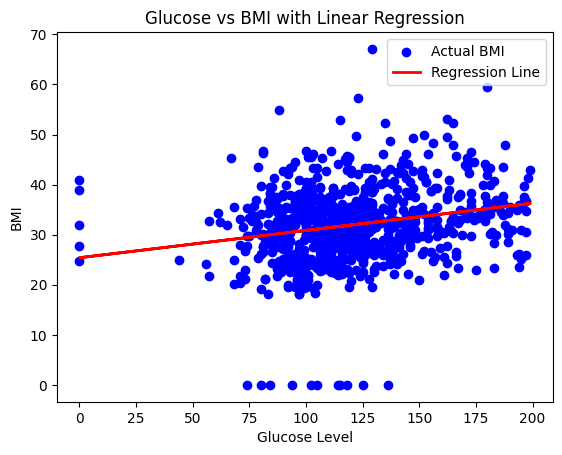

In [ ]:
#Predicting BMI using glucose
# Step 1: Prepare feature (X) and target (y)
X = df_copy[['Glucose']].values      # Glucose as feature
y = df_copy['BMI'].values             # BMI as target

# Step 2: Initialize the Linear Regression model
model = LinearRegression()

# Step 3: Fit the model
model.fit(X, y)

# Step 4: Predict BMI values using the trained model
y_pred = model.predict(X)

# Step 5: Plot actual BMI vs Glucose and regression line
plt.scatter(X, y, color='blue', label='Actual BMI')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.title('Glucose vs BMI with Linear Regression')
plt.legend()
plt.show()

In [ ]:

# Features and target
X = df_copy[['Glucose']].values     # Predictor(s)
y = df_copy['BMI'].values            # Target variable (instead of Outcome)

# Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate R-Squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the performance metrics
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R-Squared:", train_r2)
print("Testing R-Squared:", test_r2)

Training MSE: 55.61550634381507
Testing MSE: 67.16075579257195
Training R-Squared: 0.04151972540717719
Testing R-Squared: 0.06071392018823474


In [81]:
# Example: new Glucose values you want to predict BMI for
new_glucose_values = np.array([[120], [150], [180], [200]])

# Predict BMI using the trained model
predictions = model.predict(new_glucose_values)

# Print predictions
for glucose, pred in zip(new_glucose_values, predictions):
    print(f"Glucose: {glucose[0]}, Predicted BMI: {pred:.2f}")


Glucose: 120, Predicted BMI: 31.93
Glucose: 150, Predicted BMI: 33.38
Glucose: 180, Predicted BMI: 34.82
Glucose: 200, Predicted BMI: 35.78
